In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib qt

In [2]:
def show_img(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img , interpolation = 'nearest')

In [3]:
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv , cv2.COLOR_HSV2BGR)
    show_img(img)

In [4]:
def show_mask(mask):
    plt.figure(figsize = (10,10))
    plt.imshow(mask , cmap = 'gray')

In [5]:
def overlay_mask(mask , img):
    rgb_mask = cv2.cvtColor(mask , cv2.COLOR_GRAY2RGB)
    image = cv2.addWeighted(rgb_mask , 0.5 , img , 0.5 , 0)
    #show_img(image)
    return image

In [6]:
def find_biggest_contour(img):
    image = img.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE , )
    
    contour_size = [(cv2.contourArea(contour) , contour) for contour in contours]
    
    biggest_contour = max(contour_size , key = lambda x: x[0])[1]
    
    mask = np.zeros(image.shape , np.uint8)
    
    cv2.drawContours(mask , [biggest_contour] , -1 , 255 , -1)
    
    return biggest_contour , mask

In [7]:
def circle_contour(img , contour):
    image_with_ellipse = img.copy()
    
    ellipse = cv2.fitEllipse(contour)
    
    cv2.ellipse(image_with_ellipse , ellipse , (0,255,0) , 2)
    
    return image_with_ellipse

In [8]:
img = cv2.imread('./ferrari.jpg')

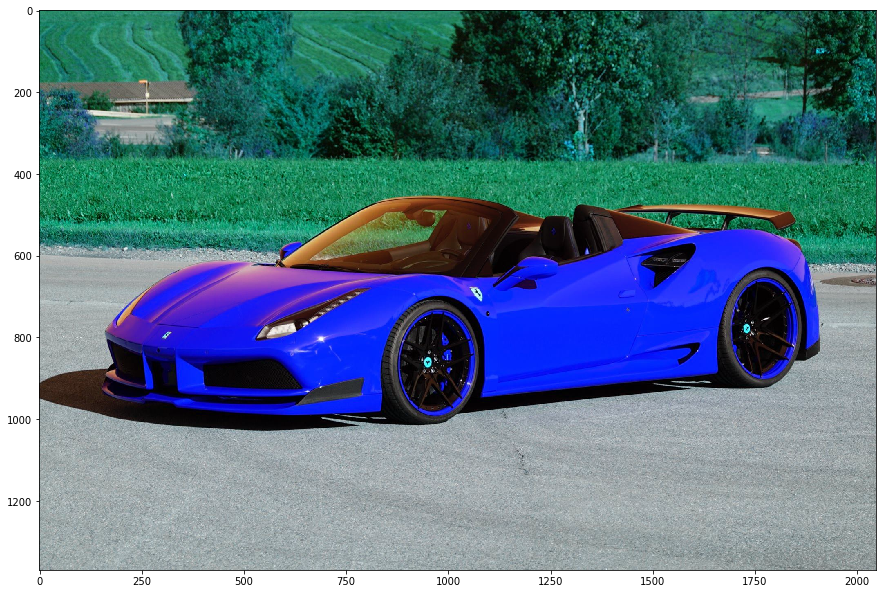

In [9]:
show_img(img)

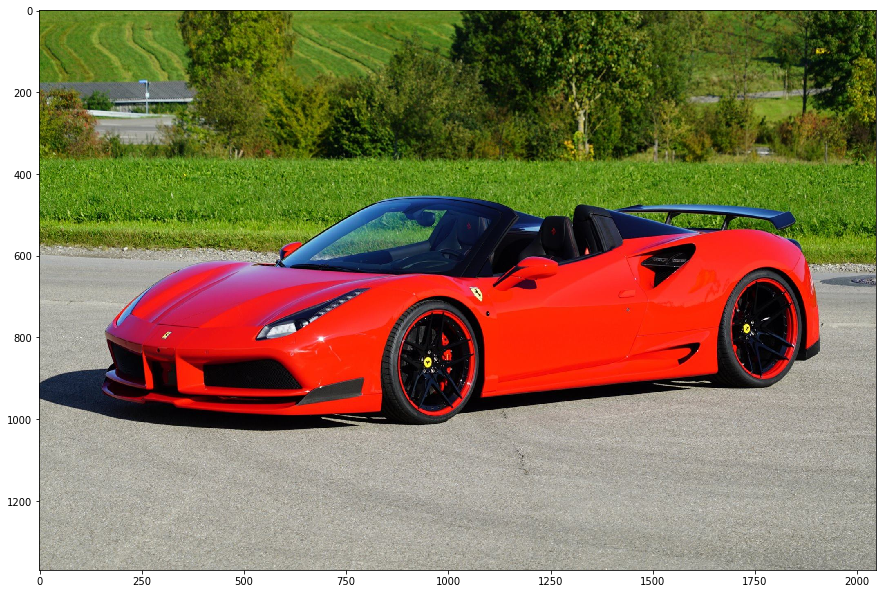

In [10]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
show_img(img)

In [11]:
# Scale down the image
max_dimension = max(img.shape)
scale = 700/max_dimension
image = cv2.resize(img , None , fx = scale , fy = scale)

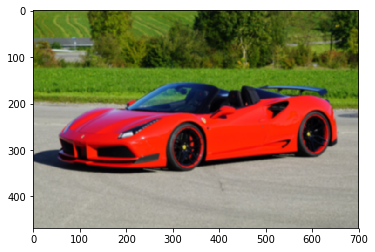

In [12]:
# blur the image
blur_img = cv2.GaussianBlur(image , (7,7) , 0)
plt.imshow(blur_img)

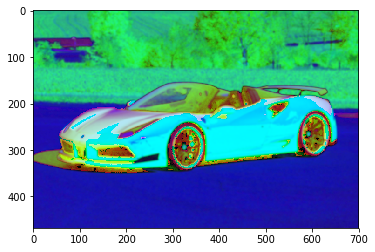

In [13]:
# convert image to hsv
blur_img_hsv = cv2.cvtColor(blur_img , cv2.COLOR_RGB2HSV)
plt.imshow(blur_img_hsv)

In [14]:
# preparing a mask

# filter_by color
min_red_color = np.array([0,60,50])
max_red_color = np.array([5,256,256])
mask1 = cv2.inRange(blur_img_hsv , min_red_color , max_red_color)

# filter  by brightness
min_red_brightness = np.array([80,80,60])
max_red_brightness = np.array([200 , 256,256])
mask2 = cv2.inRange(blur_img_hsv , min_red_brightness , max_red_brightness)

In [15]:
mask = mask1 + mask2

In [16]:
%matplotlib qt

fig , (ax1 , ax2 , ax3) = plt.subplots(1,3 , figsize = (18,18))
ax1.imshow(mask1)
ax1.set_title("Mask 1 COLOR")
ax2.imshow(mask2)
ax2.set_title("Mask 2 Brightness")
ax3.imshow(mask)
ax3.set_title("Mask1 + Mask2")

Text(0.5,1,'Mask1 + Mask2')

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (15,15))

mask_closed = cv2.morphologyEx(mask , cv2.MORPH_CLOSE , kernel)

mask_clean = cv2.morphologyEx(mask_closed , cv2.MORPH_OPEN , kernel)

In [18]:
%matplotlib qt

fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (18,18))
ax1.imshow(mask_closed)
ax1.set_title("Mask Closed")
ax2.imshow(mask_clean)
ax2.set_title("Mask Clean")

Text(0.5,1,'Mask Clean')

In [19]:
# applying mask
big_contour, red_mask = find_biggest_contour(mask_clean)
print(big_contour.shape)
print(red_mask.shape)


(677, 1, 2)
(468, 700)


In [20]:
# apply mask
overlay = overlay_mask(red_mask , image)
plt.imshow(overlay)

In [21]:
circle = circle_contour(overlay , big_contour)
plt.imshow(circle)